<a href="https://colab.research.google.com/github/aadisharma27/aadi_sharma_tmdl/blob/main/TMDLResearchProject/LoanClassificationFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
! pip install tensorflow

In [ ]:

import tensorflow as tf

In [ ]:
import re

In [ ]:
df = pd.read_csv('/Users/aadisharma/Desktop/Year 2/Block 4/TMDL/Research Project/archive/lending_club_loan_two.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


Goal: See which features are important, view the summary statistics and visualizer data.

/var/folders/mh/dk_0wktn7bv7zxy2pbwj82s00000gn/T/ipykernel_47984/2913049974.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'loan_status', data = df, palette='pastel')


Text(0, 0.5, 'Count')

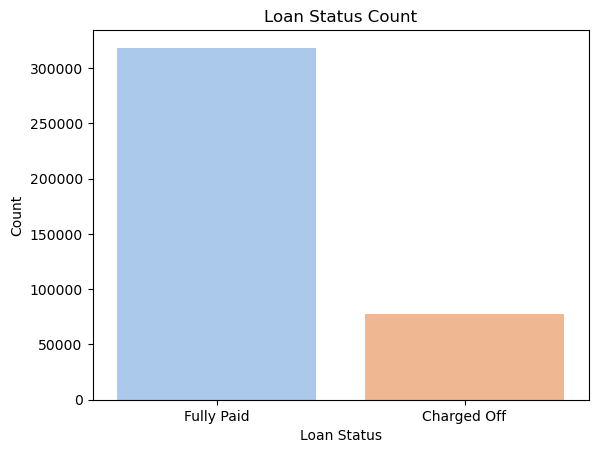

In [ ]:
sns.countplot(x = 'loan_status', data = df, palette='pastel')
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')

In [ ]:
df["loan_repaid"] = df["loan_status"].map({"Fully Paid":1, "Charged Off":0})
df[["loan_repaid","loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [ ]:
df['term'] = df['term'].str.replace(' months', '').astype(float)
df['term'].head(10)

0    36.0
1    36.0
2    36.0
3    36.0
4    60.0
5    36.0
6    36.0
7    36.0
8    60.0
9    36.0
Name: term, dtype: float64

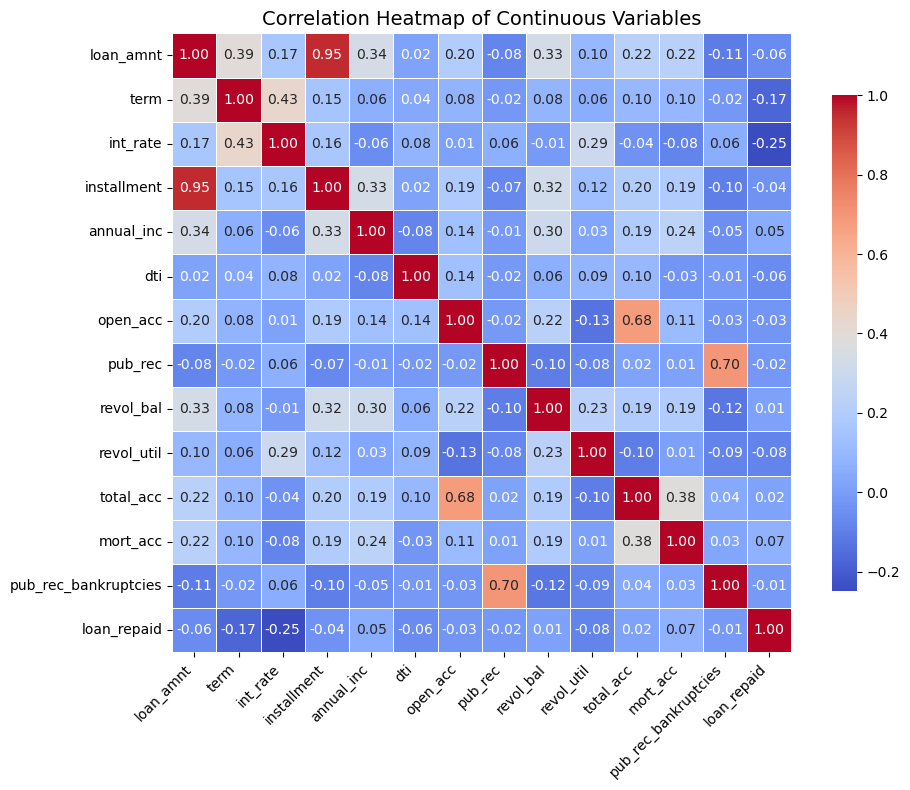

In [ ]:
numeric_df = df.select_dtypes(include=["number"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))  # Bigger figure size for better spacing


sns.heatmap(
    corr_matrix,
    annot=True,             # show correlation numbers
    fmt=".2f",              # 2 decimal places
    cmap="coolwarm",        # color scheme
    square=True,            # makes each cell square
    linewidths=0.5,         # grid lines between cells
    cbar_kws={"shrink": 0.8}  # shrink the color bar a bit
)

plt.title("Correlation Heatmap of Continuous Variables", fontsize=14)
plt.xticks(rotation=45, ha='right')  # angled ticks for readability
plt.yticks(rotation=0)
plt.tight_layout()  # auto-adjust layout to prevent overlap
plt.show()

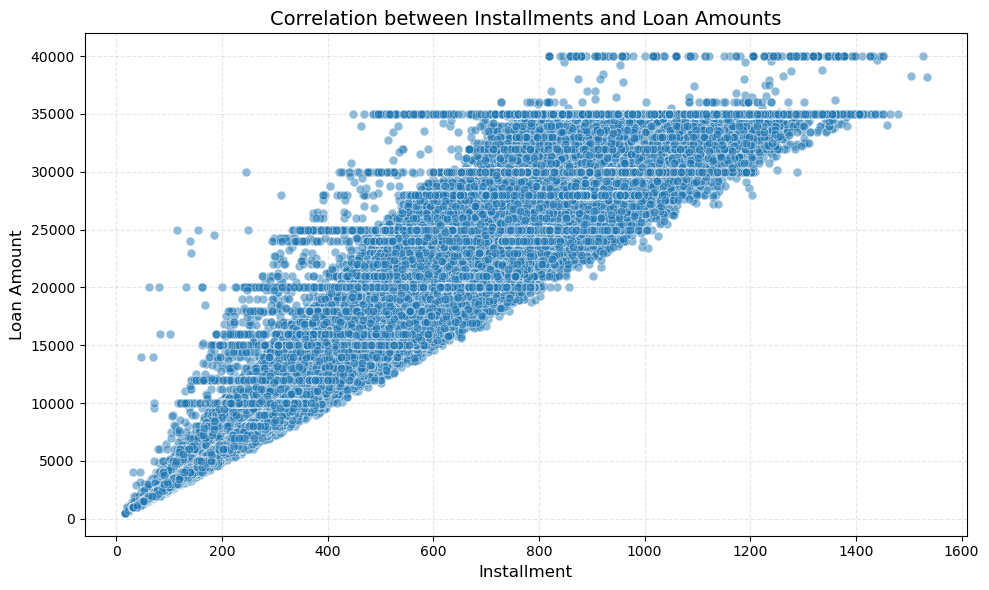

In [ ]:
plt.figure(figsize=(10, 6))  # Wider plot for better spacing

sns.scatterplot(
    x="installment",
    y="loan_amnt",
    data=df,
    alpha=0.5,                 # Makes points slightly transparent
    edgecolor="w",            # White border for contrast
    s=40                      # Smaller dots for dense plots
)

plt.title("Correlation between Installments and Loan Amounts", fontsize=14)
plt.xlabel("Installment", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)  # Add subtle gridlines
plt.tight_layout()
plt.show()

In [ ]:
df["emp_title"].nunique()

173105

In [ ]:
df["purpose"].head(10)


0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [ ]:
df["title"].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [ ]:
# df.drop(columns = ["installment", "title", "emp_title", "issue_d", "address", "earliest_cr_line" ], inplace = True)

<Axes: >

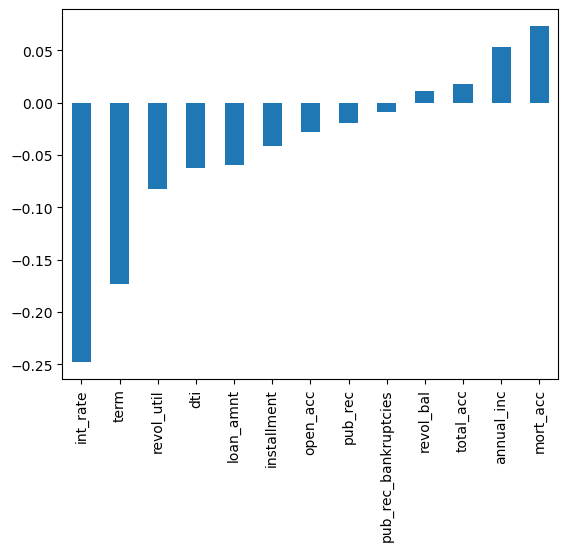

In [ ]:
numeric_df.corr()["loan_repaid"].sort_values().drop("loan_repaid").plot(kind = "bar")

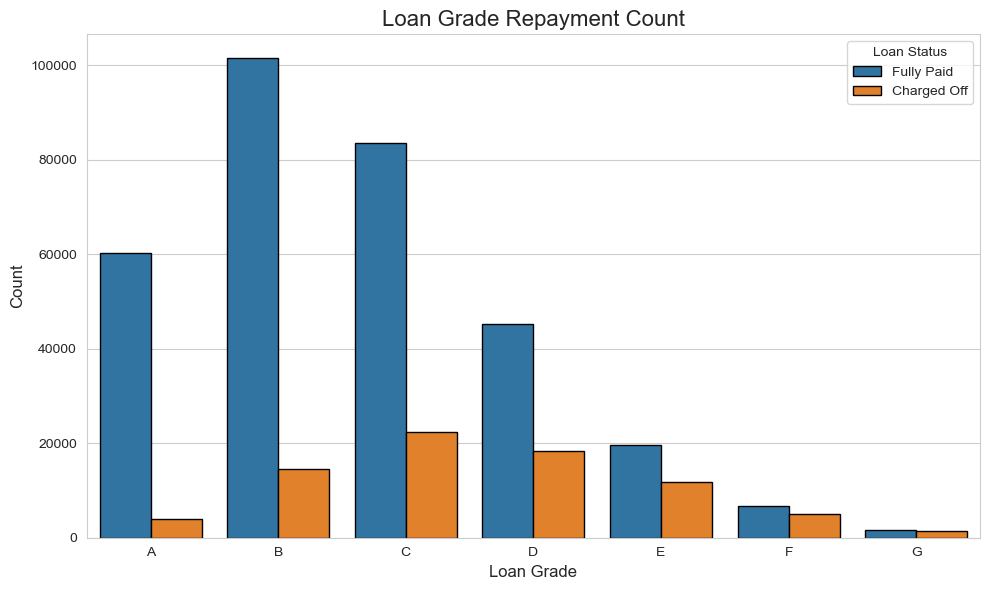

In [ ]:
df["grade"].unique()
grade_ordered = sorted(df["grade"].unique())
plt.figure(figsize=(10, 6))  # Make the plot wider
sns.set_style("whitegrid")   # Clean background

sns.countplot(
    x="grade",
    data=df,
    hue="loan_status",
    order=grade_ordered,       # Ensure grades are in correct order
    palette="tab10",            # Softer color palette
    edgecolor='black'          # Add border to bars
)

# Titles and labels
plt.title("Loan Grade Repayment Count", fontsize=16)
plt.xlabel("Loan Grade", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Loan Status", title_fontsize=10)
plt.tight_layout()
plt.show()

<Figure size 1200x400 with 0 Axes>

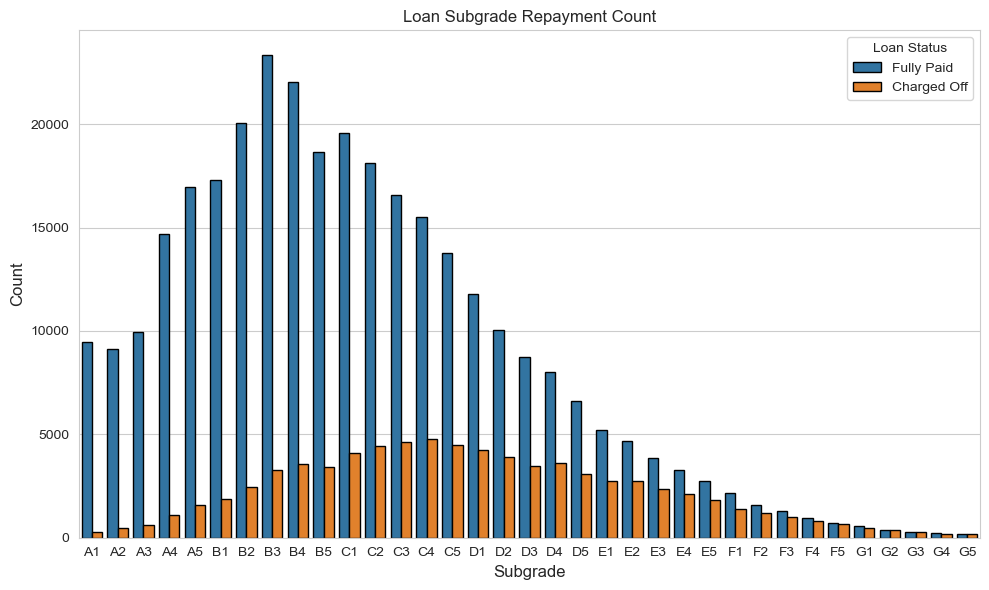

In [ ]:
plt.figure(figsize = (12,4))
subgrade_order = sorted(df["sub_grade"].unique())
plt.figure(figsize=(10, 6))  # Make the plot wider
sns.set_style("whitegrid")   # Clean background
sns.countplot(x = "sub_grade", data = df, order = subgrade_order, hue = "loan_status",  palette="tab10", edgecolor='black')
plt.xlabel("Subgrade", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Loan Subgrade Repayment Count")
plt.legend(title="Loan Status", title_fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns = "grade", inplace = True)

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

emp_title               22927
emp_length              18301
title                    1756
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [ ]:
100 * df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [ ]:
df["emp_length"].nunique()
sorted(df["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

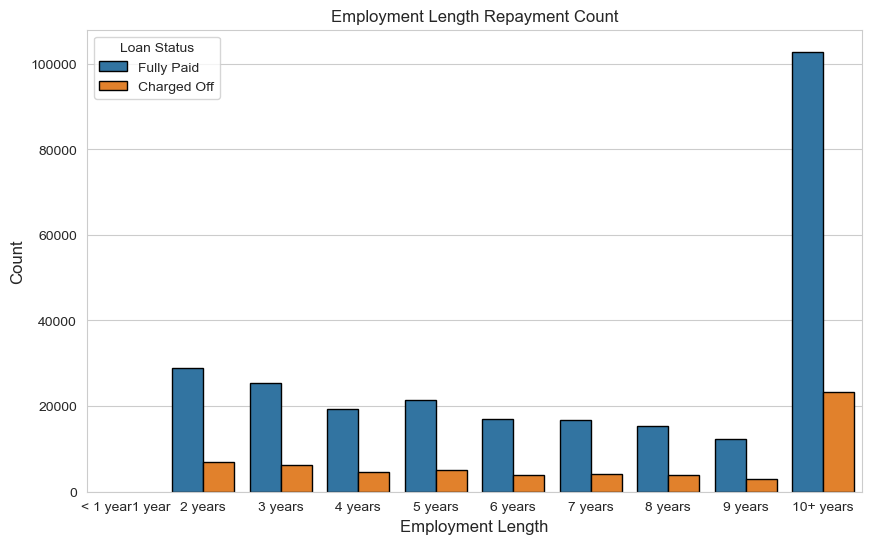

In [ ]:
emp_length_order =['< 1 year'
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
  '10+ years'
  ]

plt.figure(figsize=(10, 6))  # Make the plot wider
sns.set_style("whitegrid")   # Clean background

sns.countplot(x = "emp_length", data = df, order = emp_length_order, hue = "loan_status", palette="tab10", edgecolor='black')
plt.xlabel("Employment Length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Employment Length Repayment Count")
plt.legend(title="Loan Status", title_fontsize=10)

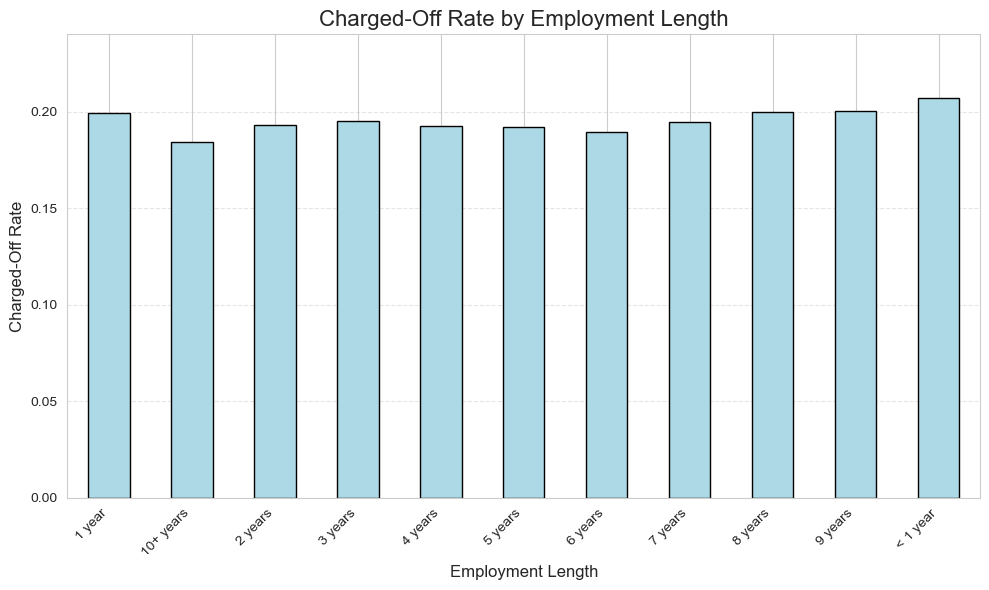

In [ ]:
emp_charged_off = df[df["loan_status"] == "Charged Off"].groupby("emp_length").count()["loan_status"]
emp_fully_paid = df[df["loan_status"] == "Fully Paid"].groupby("emp_length").count()["loan_status"]

emp_len = emp_charged_off/(emp_charged_off + emp_fully_paid)
fig, ax = plt.subplots(figsize=(10, 6))  # This is better
emp_len.sort_index().plot(
    kind='bar',
    color='lightblue',
    edgecolor='black',
    ax=ax  # Use the same axes object
)

ax.set_title("Charged-Off Rate by Employment Length", fontsize=16)
ax.set_xlabel("Employment Length", fontsize=12)
ax.set_ylabel("Charged-Off Rate", fontsize=12)
ax.set_ylim(0, 0.24)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
df.drop("emp_length", axis = 1, inplace= True)

In [ ]:
df['mort_acc'].value_counts

<bound method IndexOpsMixin.value_counts of 0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64>

In [ ]:
numeric_df.corr()["mort_acc"].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
term                    0.096220
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [ ]:
numeric_df.groupby("total_acc").mean()["mort_acc"]

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [ ]:
total_acc_avg = numeric_df.groupby("total_acc").mean()["mort_acc"]

In [ ]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]

    else:
        return mort_acc

In [ ]:
df["mort_acc"] = df.apply(lambda x : fill_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

In [ ]:
df.isnull().sum()['mort_acc']

0

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_title               22927
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
df.drop("title" ,axis = 1, inplace= True)
df.drop("emp_title", axis = 1, inplace= True)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
df['term'].value_counts

<bound method IndexOpsMixin.value_counts of 0         36.0
1         36.0
2         36.0
3         36.0
4         60.0
          ... 
396025    60.0
396026    36.0
396027    36.0
396028    60.0
396029    36.0
Name: term, Length: 395219, dtype: float64>

In [ ]:
dummies = pd.get_dummies(df['sub_grade'], drop_first= True)

df = pd.concat([df.drop('sub_grade', axis = 1), dummies], axis =1)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [ ]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1),dummies],axis=1)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [ ]:
df["home_ownership"].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [ ]:
df["home_ownership"] = df["home_ownership"].replace(["NONE", "ANY"], "OTHER")

In [ ]:
dummies = pd.get_dummies(df["home_ownership"],drop_first=True)

df = pd.concat([df.drop("home_ownership", axis=1),dummies],axis=1)

In [ ]:
df['address'].head(10)

0         0174 Michelle Gateway\nMendozaberg, OK 22690
1      1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2      87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                823 Reid Ford\nDelacruzside, MA 00813
4                 679 Luna Roads\nGreggshire, VA 11650
5    1726 Cooper Passage Suite 129\nNorth Deniseber...
6    1008 Erika Vista Suite 748\nEast Stephanie, TX...
7                            USCGC Nunez\nFPO AE 30723
8                             USCGC Tran\nFPO AP 22690
9                 3390 Luis Rue\nMauricestad, VA 00813
Name: address, dtype: object

In [ ]:
df['zipcode'] = df['address'].apply(lambda x: re.search(r'\d{5}$', x).group() if re.search(r'\d{5}$', x) else None)

In [ ]:
df['zipcode'].value_counts()

zipcode
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['zipcode'], drop_first = True)

df = pd.concat([df.drop("zipcode", axis = 1), dummies], axis = 1)

In [ ]:
df.drop('address', axis =1, inplace = True)

In [ ]:
df.drop("issue_d", axis = 1, inplace = True)

In [ ]:
df["earliest_cr_line"].head(10)

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
5    Jan-2005
6    Aug-2005
7    Sep-1994
8    Jun-1994
9    Dec-1997
Name: earliest_cr_line, dtype: object

In [ ]:
df["earliest_cr_line"] = df["earliest_cr_line"].apply(lambda x: int(x[-4:]))

In [ ]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  float64
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  object 
 6   dti                                  395219 non-null  float64
 7   earliest_cr_line                     395219 non-null  int64  
 8   open_acc                             395219 non-null  float64
 9   pub_rec                              395219 non-null  float64
 10  revol_bal                            395219 non-null  float64
 11  revol_util        

In [ ]:
df.isnull().sum()

loan_amnt      0
term           0
int_rate       0
installment    0
annual_inc     0
              ..
30723          0
48052          0
70466          0
86630          0
93700          0
Length: 80, dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

loan_amnt      0
term           0
int_rate       0
installment    0
annual_inc     0
              ..
30723          0
48052          0
70466          0
86630          0
93700          0
Length: 80, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = df.drop("loan_status", axis = 1)

In [ ]:
X = df.drop('loan_repaid', axis =1).values
y = df['loan_repaid'].values

In [ ]:
X.shape

(395219, 78)

In [ ]:
print(len(df))

395219


In [ ]:
df.shape

(395219, 79)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 101)


In [ ]:
X_train.shape

(316175, 78)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision

In [ ]:
X_train.shape

(316175, 78)

In [ ]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics =['accuracy', Precision()])

In [ ]:
model.fit(x = X_train, y = y_train, epochs = 25, batch_size = 256, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.8545 - loss: 0.3545 - precision: 0.8567 - val_accuracy: 0.8870 - val_loss: 0.2643 - val_precision: 0.8767
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.8879 - loss: 0.2663 - precision: 0.8788 - val_accuracy: 0.8872 - val_loss: 0.2626 - val_precision: 0.8776
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.8889 - loss: 0.2629 - precision: 0.8801 - val_accuracy: 0.8869 - val_loss: 0.2626 - val_precision: 0.8765
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.8882 - loss: 0.2618 - precision: 0.8790 - val_accuracy: 0.8870 - val_loss: 0.2617 - val_precision: 0.8766
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.8886 - loss: 0.2601 - precision: 0.8798 - val_accuracy: 0.8869 - val_loss: 0.2624 - val_precision: 0.8764
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.8886 - loss: 0.2594 - precision: 0.8798 - val_accu

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype('int64')

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 1s 212us/step


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

